<a href="https://colab.research.google.com/github/xychong/edgeaimonitoring/blob/main/Mini_Project_%5BData_Augmentation_1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
print(tf.__version__)

2.6.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = "/content/drive/MyDrive/Data/train"
train_path_cat = "/content/drive/MyDrive/Data/train/cat"
train_path_dog = "/content/drive/MyDrive/Data/train/dog"

val_path = "/content/drive/MyDrive/Data/val"
val_path_cat = "/content/drive/MyDrive/Data/val/cat"
val_path_dog = "/content/drive/MyDrive/Data/val/dog"

test_path = "/content/drive/MyDrive/Data/test/"

In [5]:
count = 0
for filename in os.listdir(train_path_cat):
  count += 1
print("Number of cat images for training: " + str(count))

Number of cat images for training: 1600


In [6]:
count = 0
for filename in os.listdir(train_path_dog):
  count += 1
print("Number of dog images for training: " + str(count))

Number of dog images for training: 1600


In [7]:
count = 0
for filename in os.listdir(val_path_cat):
  count += 1
print("Number of cat images for validation: " + str(count))

Number of cat images for validation: 400


In [8]:
count = 0
for filename in os.listdir(val_path_dog):
  count += 1
print("Number of dog images for validation: " + str(count))

Number of dog images for validation: 400


In [9]:
count = 0
for filename in os.listdir(test_path):
  count += 1
print("Number of images for testing: " + str(count))

Number of images for testing: 500


In [10]:
# rotation_range: value in degrees to randomly rotate pictures
# width_shift and height_shift: fraction of total width or heigh which to randomly translate pictures vertically or horizontally
# rescale: value to multiply data with before processing; RGB coefficients range from 0-225, such values too high for models to process, so we target between 0 and 1
# horizontal_flip: randomly flipping half the images horizontally
# zoom_range: randomly zooming inside pictures
# fill_mode: fill in newly created pixels

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
#train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(150,150),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

val_dataset = val_datagen.flow_from_directory(val_path,
                                              target_size=(150,150),
                                              batch_size =32,
                                              class_mode = 'binary')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [12]:
val_dataset.class_indices

{'cat': 0, 'dog': 1}

In [13]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
# Input shape is (150,150,3) where (150,150) stands for image size and 3 represents RGB color channel
# Conv2D applies a filter to input image to create a feature map that summarizes the detected features
# MaxPool2D is a pooling operation that selects the maximum element from the region of feature map covered by filter; outputs the most prominent features of previous feature map
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting multi-dimensional image array to 1D array
model.add(keras.layers.Flatten())

# Add a Dropout layer to control overfitting
model.add(keras.layers.Dropout(0.5))

# Hidden layer with 64 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
# Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
# Optimizer: Measure how good our model predicted output when compared with true output
# Helps change attributes such as weights to reduce losses
# Loss function is binary_crossentropy since we are doing binary classiication

# Adjust the learning rate of Adam optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=opt ,loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#steps_per_epoch = no. of train images/batch_size

training = model.fit(train_dataset, steps_per_epoch = 100, epochs = 64, validation_data = val_dataset, validation_steps= 25)

Epoch 1/64
100/100 [==============================] - 1069s 11s/step - loss: 0.6939 - accuracy: 0.5044 - val_loss: 0.6863 - val_accuracy: 0.5013
Epoch 2/64
100/100 [==============================] - 182s 2s/step - loss: 0.6846 - accuracy: 0.5472 - val_loss: 0.6881 - val_accuracy: 0.5525
Epoch 3/64
100/100 [==============================] - 186s 2s/step - loss: 0.6697 - accuracy: 0.5834 - val_loss: 0.6743 - val_accuracy: 0.5700
Epoch 4/64
100/100 [==============================] - 187s 2s/step - loss: 0.6578 - accuracy: 0.6028 - val_loss: 0.6871 - val_accuracy: 0.5587
Epoch 5/64
100/100 [==============================] - 184s 2s/step - loss: 0.6445 - accuracy: 0.6259 - val_loss: 0.6086 - val_accuracy: 0.6737
Epoch 6/64
100/100 [==============================] - 178s 2s/step - loss: 0.6331 - accuracy: 0.6363 - val_loss: 0.7031 - val_accuracy: 0.5763
Epoch 7/64
100/100 [==============================] - 176s 2s/step - loss: 0.6236 - accuracy: 0.6519 - val_loss: 0.5756 - val_accuracy: 0.68

In [17]:
val_loss, val_acc = model.evaluate(val_dataset)

print("Tested Acc:", val_acc)

25/25 [==============================] - 12s 461ms/step - loss: 0.4057 - accuracy: 0.8213
Tested Acc: 0.8212500214576721


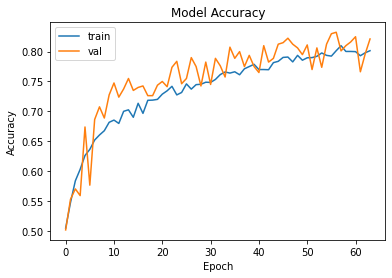

In [18]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

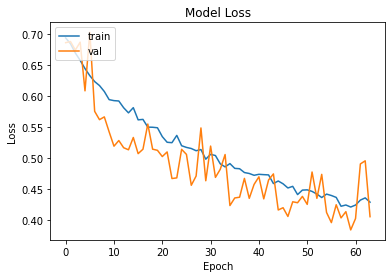

In [19]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
submission = pd.DataFrame(columns=['id','label'])
submission

,id,label


In [21]:
test_label = []
count = 0
for filename in os.listdir(test_path):
  first_word = filename.split('.')[0]
  img = image.load_img(test_path + filename, target_size = (150,150)) # load and resize image as 150x150
  Y = image.img_to_array(img) # convert image into a numpy array 
  X = np.expand_dims(Y,axis=0) # expand the dimension of that array
  val = model.predict(X)
  test_label.append(int(val))
  submission = submission.append({'id': int(first_word),'label': int(val)}, ignore_index=True)
  count += 1

print(test_label)

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 

In [22]:
print(count)

500


In [23]:
sorted_submission = submission.sort_values('id')
sorted_submission

,id,label
466,1,1
431,2,1
459,3,1
345,4,1
376,5,1
...,...,...
315,496,0
337,497,1
164,498,1
151,499,1
